In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [57]:
plt.style.use('fivethirtyeight')

In [55]:
%matplotlib inline

In [3]:
%config InlineBackend.figure_format = 'svg'

*Задание 4

В этом задании мы будем работать с датасетом, в котором приведены данные по мошенничеству с кредитными данными: Credit Card Fraud Detection (информация об авторах: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015).

Ознакомьтесь с описанием и скачайте датасет creditcard.csv с сайта Kaggle.com по ссылке:
Credit Card Fraud Detection

Данный датасет является примером несбалансированных данных, так как мошеннические операции с картами встречаются реже обычных.
Импортруйте библиотеку Pandas, а также используйте для графиков стиль “fivethirtyeight”.

Посчитайте с помощью метода value_counts количество наблюдений для каждого значения целевой переменной Class и примените к полученным данным метод plot, чтобы построить столбчатую диаграмму. Затем постройте такую же диаграмму, используя логарифмический масштаб.

На следующем графике постройте две гистограммы по значениям признака V1 - одну для мошеннических транзакций (Class равен 1) и другую - для обычных (Class равен 0). Подберите значение аргумента density так, чтобы по вертикали графика было расположено не число наблюдений, а плотность распределения. Число бинов должно равняться 20 для обеих гистограмм, а коэффициент alpha сделайте равным 0.5, чтобы гистограммы были полупрозрачными и не загораживали друг друга. Создайте легенду с двумя значениями: “Class 0” и “Class 1”. Гистограмма обычных транзакций должна быть серого цвета, а мошеннических - красного. Горизонтальной оси дайте название “Class”.


In [4]:
DATASET_PATH = './data/creditcard.csv'
PREPARED_DATASET_PATH = './data/prepared_creditcard.csv'

In [6]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [82]:
class_info = pd.Series(df['Class'].value_counts())
class_info

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

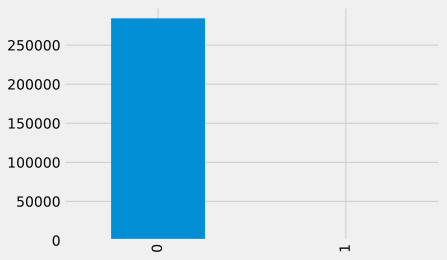

In [58]:
class_info.plot(kind='bar')

<AxesSubplot:>

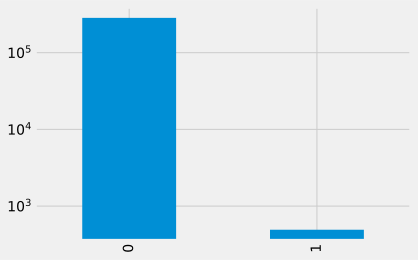

In [59]:
class_info.plot(kind='bar', logy=True)

In [89]:
df[df['Class']==1].shape

(492, 31)

In [87]:
df['V1'][df['Class'] == 1].shape

(492,)

<AxesSubplot:ylabel='Frequency'>

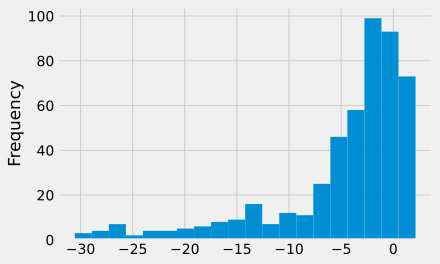

In [64]:
df['V1'][df['Class'] == 1].plot.hist(bins=20)

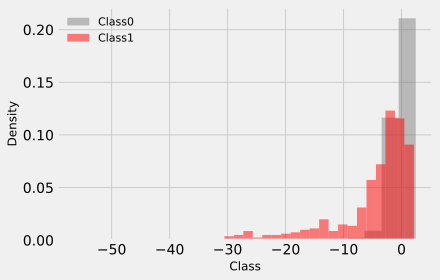

In [107]:
df['V1'][df['Class'] == 0].plot.hist(bins=20, density=True, alpha=0.5, color='gray', label='Class0')
df['V1'][df['Class'] == 1].plot.hist(bins=20, density=True, alpha=0.5, color='red', label='Class1')

plt.xlabel('Class', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=11, frameon=False)

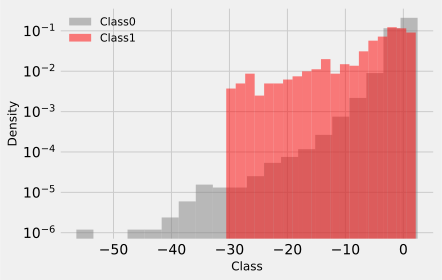

In [108]:
#На всякий случай гистограмма с логарифмическим масштабом, чтобы понять, почему у нас диапазон по Х от -50 до 0
df['V1'][df['Class'] == 0].plot.hist(bins=20, density=True, alpha=0.5, color='gray', label='Class0', logy=True)
df['V1'][df['Class'] == 1].plot.hist(bins=20, density=True, alpha=0.5, color='red', label='Class1', logy=True)
#Вопрос, нам достаточно на первом графике сделать логорифмический масштаб или на всех нужно ?

plt.xlabel('Class', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=11, frameon=False)